In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
##from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Vivian\OneDrive\桌面\movies_metadata.csv\movies_metadata.csv")

In [3]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [4]:
# pd.Series將不同的種類genres建立不同的column，stack壓縮起來
# .reset_index(level=1, drop=True)更乾淨
# s替代genres項目
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [5]:
unique_genres =set(genre for sublist in df['genres'] for genre in sublist)

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_data = mlb.fit_transform(df['genres'])
genre_df = pd.DataFrame(genre_data, columns=mlb.classes_)

In [7]:
df =pd.merge(df['vote_average'], genre_df, left_index =True, right_index =True)
df.dropna()

,vote_average,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,7.7,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6.1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5.7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,9.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,3.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45464,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mean_score =[]
for genre in genre_df.columns:
    mean_score.append(df[df[genre] == 1]['vote_average'].median())

In [40]:
tmp =zip(mean_score, genre_df.columns)
mean_score_genres =[]
for x in tmp:
    if (x[0] >= 0 ):
        mean_score_genres.append((x[0], x[1]))


In [41]:
mean_score_genres.sort(key = lambda x : -x[0])
mean_score_genres

[(6.6, 'Documentary'),
 (6.5, 'Animation'),
 (6.5, 'History'),
 (6.4, 'War'),
 (6.3, 'Music'),
 (6.2, 'Crime'),
 (6.2, 'Drama'),
 (6.1, 'Romance'),
 (6.0, 'Adventure'),
 (6.0, 'Comedy'),
 (6.0, 'Family'),
 (6.0, 'Fantasy'),
 (6.0, 'Foreign'),
 (6.0, 'Mystery'),
 (5.9, 'Action'),
 (5.8, 'Thriller'),
 (5.7, 'TV Movie'),
 (5.7, 'Western'),
 (5.6, 'Science Fiction'),
 (5.4, 'Horror')]

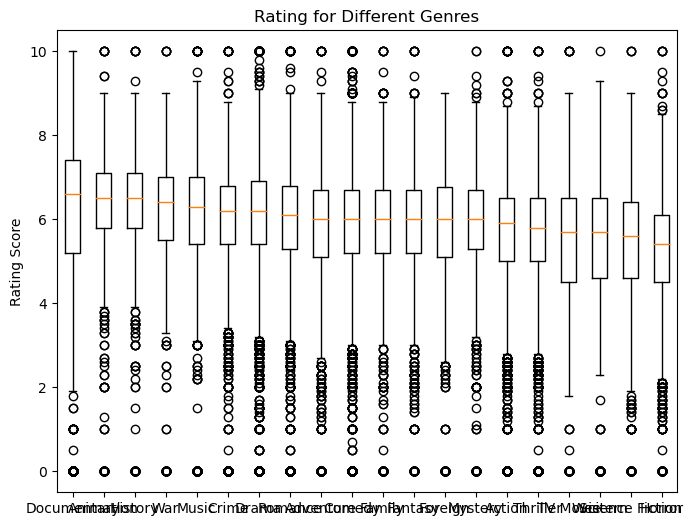

In [42]:
boxplot_score =[]
for x in [x[1] for x in mean_score_genres]:
    x_movies =df[df[x] == 1].dropna(subset=['vote_average'])
    boxplot_score.append(x_movies['vote_average'])
    
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(boxplot_score)
ax.set_title('Rating for Different Genres')
ax.set_ylabel('Rating Score')
ax.set_xticklabels([x[1] for x in mean_score_genres])
plt.show()

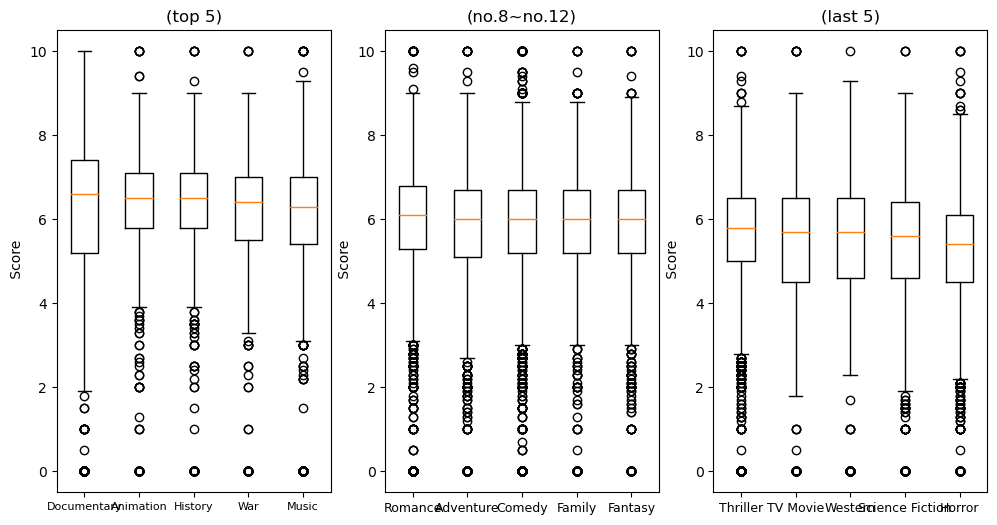

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Create a barplot of the first 10 mean scores in the first subplot
axs[0].boxplot(boxplot_score[:5])
axs[0].set_title('(top 5)')
axs[0].set_ylabel(' Score')
axs[0].set_xticklabels([x[1] for x in mean_score_genres][:5], fontsize=8)

# Create a barplot of the last 2 mean scores in the second subplot
axs[1].boxplot(boxplot_score[7:12])
axs[1].set_title('(no.8~no.12)')
axs[1].set_ylabel(' Score')
axs[1].set_xticklabels([x[1] for x in mean_score_genres][7:12], fontsize=9)


axs[2].boxplot(boxplot_score[-5:])
axs[2].set_title('(last 5)')
axs[2].set_ylabel(' Score')
axs[2].set_xticklabels([x[1] for x in mean_score_genres][-5:], fontsize=9)


# Display the plots
plt.show()